# Projeto 2 - Fabio Ferreira, Joras Oliveira e José Fernandes

TEMOS Q DESCREVER O PROJETO E COLOCAR O DIAGRAMA DE ESTOQUES E FLUXOS

**Importando bibliotecas**

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

**Definindo os parâmetros**

In [43]:
p = 150 #Potência do motor (W)
e = 0.77 #Eficiência do motor (77%)

Magua = 0.3 #Massa da água no copo (Kg)
Cagua = 4220 #Calor específico da água (J/Kg*K) 
Mar = 0.81 #Massa de ar no freezer (Kg)
Car = 1005 #Calor específico do ar (J/Kg*K)

T0agua = 361.15 #Temperatura inicial do ar (K)
T0ar = 254.15 #Temperatura inicial da água (K)
t = [T0agua, T0ar] 
Tamb = 298.15 #Temperatura do ambiente (K)

Ac = (0.05 * 0.05) + (0.05 * 0.15 * 4) #Area do copo (m)
As = (0.05 * 0.05) #Area da superfície(m)
Areaintparede = (0.45 * 0.45 * 2) + (1 * 0.5 * 4) #(m)
Areaextparede = (0.5 * 0.5 * 2) + (1 * 0.5 * 4) #(m)
a = [Areaintparede, Areaextparede] #Area interna e externa da parede
Dparede = 0.05 #Espessura da parede (m)
r1 = 0.037 #raio interno do copo (m)
r2 = 0.04 #raio externo do copo (m)

h = 10 #Coeficiente de transferencia convectiva da água (W/m^2*K)
Kc = 0.02 #Coeficiente de condutividade térmica do copo(W/m*K)
Kp = 0.05 #Coeficiente de condutividade térmica da parede(W/m*K)

**Calculando as resistências térmicas**

In [44]:
R = math.log(r2/r1)/(Kp * 0.12 * 2 *math.pi)
res = 1/(h * Ac)
res1 = 1/(h * Areaintparede)
res2 = Dparede/(Kp * Areaintparede)
res3 = 1/(h * Areaextparede)

**Criando a função do modelo**

In [45]:
def modelo(T, t): 
    Tagua = T[0]
    Tar = T[1]
    
    q1 = h * As * (Tagua - Tar)
    q2 = (Tagua - Tar) / (res + R)            
    qp = (Tamb - Tar) / (res1 + res2 + res3)
    qm = p* e
    
    dtAguadT = 1/(Magua * Cagua)*(-q1 - q2)
    dtArdT = 1/(Mar * Car)*(q1 + q2 + qp - qm)
    dxdt = [dtAguadT,dtArdT]
    
    return dxdt

**Resolvendo o modelo e plotando o gráfico**

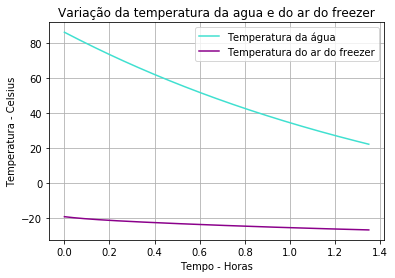

In [50]:
#Criando a lista de tempo
deltaT = 1
tempo = np.arange(1, 4860, deltaT) #5h 

#Resolvendo o modelo
solucao = odeint(modelo, t, tempo)

#Plotando o gráfico
plt.plot(tempo/3600, solucao[:,0]-275.15, "turquoise", label = "Temperatura da água")
plt.plot(tempo/3600, solucao[:,1]-273.15, "darkmagenta",  label ='Temperatura do ar do freezer')
plt.xlabel("Tempo - Horas")
plt.ylabel("Temperatura - Celsius")
plt.title("Variação da temperatura da agua e do ar do freezer")
plt.grid(True)
plt.legend()
plt.show()

**Dados de validação**

In [47]:
Tempagua = [88.50, 0.50] #Temperatura inicial da água/Temperatura final da água
Tempar = [-19, -19] #Temperatura inicial do ar/Temperatura final do ar

tempovalidacao = [0, 1.35] #Tempo da validação (s)

**Gráfico comparativo entre validação e modelo**

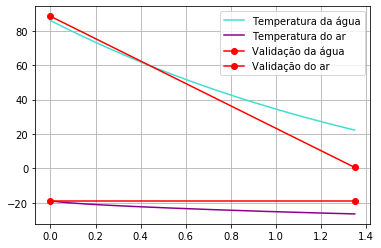

In [48]:
plt.plot(tempo/3600, solucao[:,0]-275.15, "turquoise", label = "Temperatura da água")
plt.plot(tempo/3600, solucao[:,1]-273.15, "darkmagenta",  label ='Temperatura do ar')
plt.plot(tempovalidacao, Tempagua, 'r-o', label ='Validação da água')
plt.plot(tempovalidacao, Tempar, 'r-o', label ='Validação do ar')
plt.legend()
plt.grid(True)
plt.show()


# **Perguntas e Gráficos Conclusivos**

Primeira pergunta: De que forma as dimensões do copo alteram a temperatura final da água após três horas?

Segunda pergunta:  Alterar a massa de água interfere no tempo para a temperatura da agua atingir 0˚C?

Terceira Pergunta: Como diferentes eficiências do motor alteram o tempo de equilíbrio do modelo?


**Priemira pergunta:**

definindo os diferentes volumes do copo, massas da agua e novo intervalo de tempo:

In [7]:
#Priemeira pergunta
AltC = 0.12 #altura do copo em metros

Re = [0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09] # diferentes dimensoes para o raio externo
Ri = []  # raio interno

Ma = []  #massa de agua no copo

deltaT = 1
tempo = np.arange(1, 10800, deltaT) #3h 

valores = []  #os valores que teremos no final

for r in Re:
    Ri.append(r-0.003) #o raio interneo = o raio extermo - a espessura do copo
    
for r in Ri:
    Ma.append(r*AltC) #calculando a massa da agua para cada dimensao do copo

**calculando a pergunta 2 e plotando o grafico**


In [8]:
#novo modelo:
def modelo2(T, t, R, Magua): 
    Tagua = T[0]
    Tar = T[1]
    
    q1 = h * As * (Tagua - Tar)
    q2 = (Tagua - Tar) / (res + R)            
    qp = (Tamb - Tar) / (res1 + res2 + res3)
    qm = p* e
    
    dtAguadT = 1/(Magua * Cagua)*(-q1 - q2)
    dtArdT = 1/(Mar * Car)*(q1 + q2 + qp - qm)
    dxdt = [dtAguadT,dtArdT]
    
    return dxdt

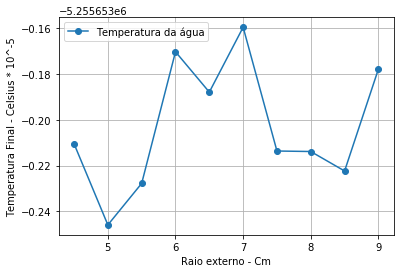

In [9]:
n = 0
for n in range(10):
    R2 = math.log(Re[n]/Ri[n])/(Kp * 0.12 * 2 *math.pi) #recalulando o R para o modelo
    Magua2 = Ma[n] #redefinindo o valor de Magua no modelo
    
    result = odeint(modelo2, t, tempo, args=(R2, Magua2))
    k = result[:,0]
    valores.append((k[-1] - 273.15)*1000000) # colocando a temperatura final na lista, convertendo para celcius, 
    n+=1                                     # e multiplicando pro 10^5 para facilitar a leitura

Re = [i * 100 for i in Re]
plt.plot(Re, valores, 'o-', label = "Temperatura da água",)
#plt.plot(Re, valores, "darkmagenta",  label ='Temperatura do ar do freezer')
plt.xlabel("Raio externo - Cm")
plt.ylabel("Temperatura Final - Celsius * 10^-5")
#plt.title("Variação da temperatura da agua e do ar do freezer")
plt.grid(True)
plt.legend()
plt.show()

**Segunda Pergunta**

Redefinindo os valores mudados para o calculo da primeira pergunta, de volta para os valores originais

In [10]:
step = 0.025
Ma = np.arange(0.025, 0.3, deltaT) #5h 

In [11]:
n = 0
for n in range(10):
    Magua2 = Ma2[n] #redefinindo o valor de Magua no modelo
    result = odeint(modelo2, t, tempo, args=(R,Magua2))
    temperaturas = (result[:,0]-273.15)
    n+=1    

NameError: name 'Ma2' is not defined

**Terceira Pergunta:**

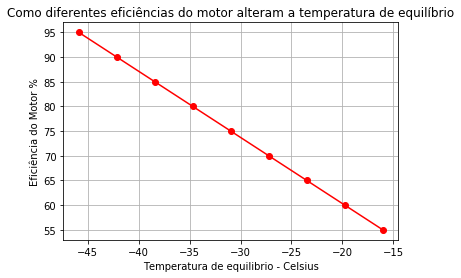

In [51]:
efi = np.arange(0.55, 1, 0.05)
tempo2 = np.arange(0, 80000000, 1)

def modelo3(T, t, e): 
    Tagua = T[0]
    Tar = T[1]
    
    q1 = h * As * (Tagua - Tar)
    q2 = (Tagua - Tar) / (res + R)            
    qp = (Tamb - Tar) / (res1 + res2 + res3)
    qm = p* e
    
    dtAguadT = 1/(Magua * Cagua)*(-q1 - q2)
    dtArdT = 1/(Mar * Car)*(q1 + q2 + qp - qm)
    dxdt = [dtAguadT,dtArdT]
    
    return dxdt

tempoequi = []

for i in range(len(efi)):
    solucao3 = odeint(modelo3, t, tempo2, args=(efi[i],))
    tempagua2 = solucao3[:,0]
    tempar2 = solucao3[:,1]
    for e in range(len(tempagua2)):
        if tempagua2[e] == tempar2[e]:
            tempoequi.append((tempagua2[e]-273.15))
            break

eficiencia = [e * 100 for e in efi]

plt.plot(tempoequi, eficiencia, 'r-o')
plt.title('Como diferentes eficiências do motor alteram a temperatura de equilíbrio')
plt.xlabel('Temperatura de equilibrio - Celsius')
plt.ylabel('Eficiência do Motor %')
plt.grid(True)
plt.show()